 ÿßŸÜÿ™ÿÆÿßÿ® ŸÖŸÜÿ®ÿπ Ÿà ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨ ÿØÿßÿØŸá (Web Scraping)

In [1]:

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time

options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
"""
for less rate i have : https://taaghche.com/book-review/882/%D8%A8%D9%88%D9%81-%DA%A9%D9%88%D8%B1
https://taaghche.com/book-review/95170/%DA%A9%D8%AA%D8%A7%D8%A8%D8%AE%D8%A7%D9%86%D9%87-%D9%86%DB%8C%D9%85%D9%87-%D8%B4%D8%A8
"""
url = "https://taaghche.com/book-review/882/%D8%A8%D9%88%D9%81-%DA%A9%D9%88 %D8%B1"
driver.get(url)
print("‚úÖ ÿµŸÅÿ≠Ÿá ÿ®ÿßÿ≤ ÿ¥ÿØ!")

all_main_comments = []
page = 1

try:
    while True:
        last_height = driver.execute_script("return document.body.scrollHeight")
        while True:
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(1)
            new_height = driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height

        comment_blocks = driver.find_elements(By.CLASS_NAME, "bookComments_comment___TU8v")
        for block in comment_blocks:
            try:
                block_class = block.get_attribute("class")
                parent_class = block.find_element(By.XPATH, "..").get_attribute("class")
                if "bookComments_replies__dXS_n" in block_class or "bookComments_replies__dXS_n" in parent_class:
                    continue
                text_elem = block.find_element(By.CLASS_NAME, "bookComments_content___9Xbz")
                text = text_elem.text.strip()
                stars_count = len(block.find_elements(By.CLASS_NAME, "icon-star-2"))
                if (text, stars_count) not in all_main_comments:
                    all_main_comments.append((text, stars_count))
            except:
                continue

        print(f"‚úÖ ÿµŸÅÿ≠Ÿá {page}: ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨‚Äåÿ¥ÿØŸá: {len(all_main_comments)}")

        if len(all_main_comments) >= 1200:
            print("üéâ ÿ®Ÿá €±€≤€∞€∞ ÿØ€åÿØ⁄ØÿßŸá ÿ±ÿ≥€åÿØ€åŸÖ!")
            break

        try:
            more_button = driver.find_element(By.CLASS_NAME, "bookComments_moreButton__1xrpL")
            driver.execute_script("arguments[0].scrollIntoView({behavior: 'smooth', block: 'center'});", more_button)
            time.sleep(1)
            driver.execute_script("arguments[0].click();", more_button)
            time.sleep(3)
            page += 1
        except:
            print("‚ùå ÿØ⁄©ŸÖŸá 'ŸÜŸÖÿß€åÿ¥ ÿ®€åÿ¥ÿ™ÿ±' Ÿæ€åÿØÿß ŸÜÿ¥ÿØ. ÿßÿ≠ÿ™ŸÖÿßŸÑÿßŸã ÿ®Ÿá ÿ¢ÿÆÿ± ÿ±ÿ≥€åÿØ€åŸÖ.")
            break

finally:
    driver.quit() 
    print("‚úÖ ŸÖÿ±Ÿàÿ±⁄Øÿ± ÿ®ÿ≥ÿ™Ÿá ÿ¥ÿØ.")




‚úÖ ÿµŸÅÿ≠Ÿá ÿ®ÿßÿ≤ ÿ¥ÿØ!
‚úÖ ÿµŸÅÿ≠Ÿá 1: ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨‚Äåÿ¥ÿØŸá: 50
‚úÖ ÿµŸÅÿ≠Ÿá 2: ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨‚Äåÿ¥ÿØŸá: 100
‚úÖ ÿµŸÅÿ≠Ÿá 3: ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨‚Äåÿ¥ÿØŸá: 150
‚úÖ ÿµŸÅÿ≠Ÿá 4: ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨‚Äåÿ¥ÿØŸá: 200
‚úÖ ÿµŸÅÿ≠Ÿá 5: ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨‚Äåÿ¥ÿØŸá: 250
‚úÖ ÿµŸÅÿ≠Ÿá 6: ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨‚Äåÿ¥ÿØŸá: 300
‚úÖ ÿµŸÅÿ≠Ÿá 7: ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨‚Äåÿ¥ÿØŸá: 350
‚úÖ ÿµŸÅÿ≠Ÿá 8: ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨‚Äåÿ¥ÿØŸá: 398
‚úÖ ÿµŸÅÿ≠Ÿá 9: ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨‚Äåÿ¥ÿØŸá: 445
‚úÖ ÿµŸÅÿ≠Ÿá 10: ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨‚Äåÿ¥ÿØŸá: 495
‚úÖ ÿµŸÅÿ≠Ÿá 11: ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ™ÿÆÿ±ÿßÿ¨‚Äåÿ¥ÿØŸá: 542
‚úÖ ÿµŸÅÿ≠Ÿá 12: ÿ™ÿπÿØÿßÿØ ⁄©ŸÑ ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß€å ÿßÿ≥ÿ

In [5]:
df = pd.DataFrame(all_main_comments, columns=["review_text", "stars"])
df.to_csv("C:\\Users\\Sepehr\\SentimentProject\\data\\raw_reviews.csv", index=False, encoding="utf-8-sig")
print(f"üíæ ÿØÿßÿØŸá‚ÄåŸáÿß ÿØÿ± ŸÅÿß€åŸÑ ÿ∞ÿÆ€åÿ±Ÿá ÿ¥ÿØŸÜÿØ! ÿ™ÿπÿØÿßÿØ ŸÜŸáÿß€å€å ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß: {len(df)}")

print("\nüìã ŸÜŸÖŸàŸÜŸá ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß:")
for i, (text, stars_count) in enumerate(all_main_comments[:10], 1):
    print(f"ÿØ€åÿØ⁄ØÿßŸá {i}:") 
    print(f"ŸÖÿ™ŸÜ: {text}")
    print(f"ÿßŸÖÿ™€åÿßÿ≤: {stars_count} ÿ≥ÿ™ÿßÿ±Ÿá")
    print("-" * 50)

üíæ ÿØÿßÿØŸá‚ÄåŸáÿß ÿØÿ± ŸÅÿß€åŸÑ ÿ∞ÿÆ€åÿ±Ÿá ÿ¥ÿØŸÜÿØ! ÿ™ÿπÿØÿßÿØ ŸÜŸáÿß€å€å ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß: 1140

üìã ŸÜŸÖŸàŸÜŸá ÿØ€åÿØ⁄ØÿßŸá‚ÄåŸáÿß:
ÿØ€åÿØ⁄ØÿßŸá 1:
ŸÖÿ™ŸÜ: ÿ®ÿß ÿ≥ŸÑÿßŸÖ ÿ®Ÿá ŸÜÿ∏ÿ± ŸÖŸÜ ⁄©ÿ≥€å ⁄©Ÿá ÿßÿ≤ ÿßÿØÿ®€åÿßÿ™ ÿ≥ÿ± ÿØÿ± ŸÖ€å ÿ¢Ÿàÿ±ÿØ ÿå ŸáŸÖÿßŸÜ ÿßŸàÿß€åŸÑ ⁄©ÿ™ÿßÿ® ŸÖÿ™Ÿàÿ¨Ÿá ŸÖ€å ÿ¥ŸàÿØ ⁄©Ÿá ÿ®ÿß €å⁄© ÿ¥ÿßŸá⁄©ÿßÿ± ÿ±Ÿàÿ®ÿ±Ÿàÿ≥ÿ™ . ŸÑÿßÿ≤ŸÖ ŸÜ€åÿ≥ÿ™ ÿ®ÿß ÿ¨ŸáÿßŸÜ ÿ®€åŸÜ€å ŸÜŸà€åÿ≥ŸÜÿØŸá ŸÖŸàÿßŸÅŸÇ ÿ®ÿßÿ¥€åŸÖ ÿå ŸÑÿßÿ≤ŸÖ ŸÜ€åÿ≥ÿ™ ŸÅÿ∂ÿß€å ÿ∞ŸáŸÜ€å ŸÜŸà€åÿ≥ŸÜÿØŸá ÿ±ÿß ÿØŸàÿ≥ÿ™ ÿ®ÿØÿßÿ±€åŸÖ ÿå €åÿß ÿßÿ≤ ÿÆŸàÿßŸÜÿØŸÜ ⁄©ÿ™ÿßÿ® ŸÑÿ∞ÿ™ ÿ®ÿ®ÿ±€åŸÖ(ÿß€åŸÜ ⁄©ÿ™ÿßÿ® ÿ®ÿ±ÿß€å ŸÑÿ∞ÿ™ ÿ®ÿ±ÿØŸÜ ŸÜŸàÿ¥ÿ™Ÿá ŸÜÿ¥ÿØŸá)ÿå ÿ®ÿ±ÿß€å ÿß€åŸÜ ⁄©Ÿá ÿ®ÿØÿßŸÜ€åŸÖ ÿß€åŸÜ ÿ±ŸÖÿßŸÜ €å⁄© ÿ¥ÿßŸá⁄©ÿßÿ± ÿßÿ≥ÿ™ . Ÿáÿ± ⁄ÜŸÜÿØ ŸÅŸáŸÖ ⁄©ÿßŸÖŸÑ ⁄©ÿ™ÿßÿ® ŸÖÿ¥⁄©ŸÑ ÿßÿ≥ÿ™ ÿå ÿßŸÖÿß ÿß€åŸÜ ÿ®Ÿá ÿÆŸàÿßŸÜŸÜÿØŸá ÿ®ÿ± ŸÖ€å ⁄Øÿ±ÿØÿØ Ÿà ŸÜŸá ÿ®Ÿá ŸÜŸà€åÿ≥ŸÜÿØŸá . ÿßÿ™ŸÅÿßŸÇÿß ŸÖÿ¥ÿÆÿµ ÿßÿ≥ÿ™ ⁄©Ÿá ŸÜŸà€åÿ≥ŸÜÿØŸá ÿ®ÿ±ÿß€å ÿß€åŸÜ ÿßÿ´ÿ± ŸàŸÇÿ™ ⁄Øÿ∞ÿßÿ¥ÿ™Ÿá Ÿà ÿ±Ÿà€åÿ¥ ⁄©ÿßÿ± ⁄©ÿ±ÿØŸá . ÿ®ÿß ŸÜÿ∏ÿ±ÿßÿ™ ÿ®ÿ±ÿÆ€å ÿØÿ± ŸÖŸàÿ

Ÿæÿß⁄©ÿ≥ÿßÿ≤€å Ÿà Ÿæ€åÿ¥‚ÄåŸæÿ±ÿØÿßÿ≤ÿ¥ ŸÖÿ™ŸÜ

In [14]:
import pandas as pd
import re
from pathlib import Path
from hazm import Normalizer, Lemmatizer, word_tokenize, stopwords_list

BASE_DIR = Path("C:/Users/Sepehr/SentimentProject")
RAW_PATH = BASE_DIR / "data" / "raw_reviews.csv"
CLEANED_PATH = BASE_DIR / "data" / "cleaned_reviews.csv"
CLEANED_XLSX_PATH = BASE_DIR / "data" / "cleaned_reviews.xlsx"

CLEANED_PATH.parent.mkdir(parents=True, exist_ok=True)

df = pd.read_csv(RAW_PATH, encoding="utf-8-sig")
print(f"Total raw data: {len(df)}")

df.drop_duplicates(subset=["review_text"], inplace=True)
df.dropna(subset=["review_text"], inplace=True)
print(f"After removing duplicates/empty rows: {len(df)}")

def label_sentiment(stars):
    if stars >= 4:
        return 1
    elif stars < 3:
        return 0
    else:
        return None

df["label"] = df["stars"].apply(label_sentiment)
df = df.dropna(subset=["label"])
df["label"] = df["label"].astype(int)
print("Sentiment label distribution:")
print(df["label"].value_counts())

normalizer = Normalizer()
lemmatizer = Lemmatizer()
stopwords = set(stopwords_list())

extended_stopwords = {
    "Ÿáÿß", "Ÿáÿß€å", "€åŸá", "ÿß€å", "ÿß€åŸÜ", "ÿ¢ŸÜ", "ÿ±ÿß", "Ÿà", "ÿ®ÿß", "ÿØÿ±", "ÿ®Ÿá", "ÿßÿ≤", "⁄©Ÿá", "ŸÖ€å", "ÿ¥ÿØ", "ÿ¥ÿØŸá",
    "ÿßÿ≥ÿ™", "ÿ®ŸàÿØ", "ÿ®ÿ±ÿß€å", "ÿ™ÿß", "Ÿáÿ±", "ŸáŸÖ", "⁄ÜŸàŸÜ", "ŸàŸÑ€å", "ÿß⁄Øÿ±", "⁄Üÿ±ÿß", "⁄©ÿ¨ÿß", "⁄ÜŸá", "⁄©ÿØÿßŸÖ", "ŸáŸÖŸá",
    "Ÿá€å⁄Ü", "ÿ®ÿπÿ∂€å", "⁄ÜŸÜÿØ", "€å⁄©€å", "ÿØ€å⁄Øÿ±", "ÿÆŸàÿØ", "ŸÖÿß", "ÿ¥ŸÖÿß", "ÿß€åÿ¥ÿßŸÜ", "ÿßŸàŸÜ", "ÿß€åŸÜÿ¨ÿß", "ÿ¢ŸÜÿ¨ÿß",
    "Ÿáÿ≥ÿ™", "ŸÜ€åÿ≥ÿ™", "ÿ®ŸàÿØŸÜ", "ÿ®ÿßÿ¥", "⁄©ŸÜŸá", "⁄Ø€åÿ±", "ÿØÿßÿ±Ÿá", "ŸÖ€åÿ¥Ÿá", "ÿ®ÿ¥Ÿá", "ÿØÿßÿ¥ÿ™", "ÿØÿßÿ¥ÿ™ŸÜ", "ÿÆŸàÿßŸáÿØ",
    "⁄©ÿ™ÿßÿ®", "ÿ≤ŸÜÿØ⁄Ø€å", "ÿØÿßÿ≥ÿ™ÿßŸÜ", "ŸÜŸàÿ±ÿß", "ÿµŸÅÿ≠Ÿá", "ŸÜŸà€åÿ≥ŸÜÿØŸá" ,"ŸàÿßŸÇÿπÿß", "ÿÆŸàŸÜÿØŸÜ", "ŸÖ€å⁄©ŸÜŸá", "ÿ®ÿßÿ¥Ÿá", "ŸáÿØÿß€åÿ™", "ÿµÿßÿØŸÇ", "ÿ®ŸàŸÅ", "⁄©Ÿàÿ±", "ŸÜŸàÿ¥ÿ™Ÿá","ÿ≠ÿ≥ÿ±ÿ™", "ŸÜŸÖ€å", "ÿÆŸàŸÜÿØ"
}


stopwords.update(extended_stopwords)

def preprocess_text(text: str) -> str:
    text = normalizer.normalize(str(text))
    text = re.sub(r"[^\u0600-\u06FF\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    tokens = word_tokenize(text)
    processed_tokens = []
    for word in tokens:
        word = lemmatizer.lemmatize(word)
        if "#" in word:
            word = word.split("#")[-1]
        if word not in stopwords and len(word) > 2 and not word.isnumeric():
            processed_tokens.append(word)
    return " ".join(processed_tokens) if processed_tokens else ""

df["cleaned_text"] = df["review_text"].apply(preprocess_text)

df_cleaned = df[["cleaned_text", "label"]].copy()
df_cleaned = df_cleaned[df_cleaned["cleaned_text"].str.strip() != ""]

print("Class distribution before balancing check:")
print(df_cleaned["label"].value_counts())
if df_cleaned["label"].value_counts().min() / df_cleaned["label"].value_counts().max() < 0.5:
    print("Warning: Significant class imbalance detected. Consider balancing techniques.")

df_cleaned.to_csv(CLEANED_PATH, index=False, encoding="utf-8-sig")
# try:
#     df_cleaned.to_excel(CLEANED_XLSX_PATH, index=False)
#     excel_saved = True
# except Exception as e:
#     print(f"Error saving Excel file: {e}")
#     excel_saved = False

print(f"Cleaned CSV saved: {CLEANED_PATH.exists()}")
# print(f"Cleaned Excel saved: {excel_saved}")
print(f"Number of cleaned rows: {len(df_cleaned)}")

print("\nSample cleaned data:")
print(df_cleaned.sample(10))

Total raw data: 1140
After removing duplicates/empty rows: 1137
Sentiment label distribution:
label
1    688
0    340
Name: count, dtype: int64
Class distribution before balancing check:
label
1    647
0    336
Name: count, dtype: int64
Cleaned CSV saved: True
Number of cleaned rows: 983

Sample cleaned data:
                                           cleaned_text  label
662   ÿ≠ÿ±ŸÅ ŸÜÿØÿßÿ±Ÿá ÿ™ÿÆ€åŸÑ ŸÜÿØÿßÿ±Ÿá ÿßŸÜ⁄Ø€åÿ≤Ÿá ŸÖÿπŸÜÿß ŸàÿßŸÇÿπ€å ⁄©ŸÑŸÖŸá ÿ≥Ÿà...      1
1103  ŸÜÿ∏ÿ±ŸÖ ŸÜ⁄ØÿßŸá ÿØŸÜ€åÿß ŸÜ⁄ØÿßŸá ŸÖŸÜŸÅ€å ÿØ⁄©ÿ™ÿ± ÿ¥ÿ±€åÿπÿ™€å ÿØÿ±ÿØŸáÿØÿß€åÿ™ ...      0
393   ŸÅÿ∂ÿß€å ÿ±ÿßÿ≤ ÿ¢ŸÑÿß€å Ÿæ€å⁄Ü ŸÅÿ∂ÿß€å ÿ±ÿßÿ≤ÿßŸÑŸàÿØ€å ŸÖ€åÿ±Ÿá ÿ¨ÿßŸÑÿ®Ÿá ŸÖ€åÿÆ...      1
1065                                       Ÿàÿ¨Ÿá€å Ÿáÿßÿ¥ ⁄©ÿ±Ÿà      1
136   ⁄©ÿ™ÿßÿ®€å ÿ≥ÿ®⁄© ŸÇÿ∑ÿπÿß ÿ®Ÿáÿ™ÿ±€åŸÜŸá ŸÖÿ™ŸÜ ŸÖÿ™ŸÜŸá ŸÖÿÆŸàŸÅ ÿ®ÿπÿØ€å ÿ¥ŸÜÿßŸà...      1
278   ÿ®ÿØŸàŸÜ€åŸÜ ÿ¥ÿÆÿµ€åÿ™ ÿ¢ŸÇÿß ŸÜŸÅÿ± ÿ¥ÿÆÿµ€åÿ™ ÿÆÿßŸÜŸàŸÖ ŸÜŸÅÿ± Ÿáÿ≥ÿ™ŸÜ ÿØÿ±⁄© ⁄©ŸÖ⁄©      1
488                         ÿÆŸàÿ®€åŸá ÿ≠ÿ™ŸÖÿ

ÿ™ÿ≠ŸÑ€åŸÑ ÿß⁄©ÿ™ÿ¥ÿßŸÅ€å ÿØÿßÿØŸá‚ÄåŸáÿß (EDA).

In [15]:
import pandas as pd

df = pd.read_csv(CLEANED_PATH, encoding="utf-8-sig")

df["cleaned_text"] = df["cleaned_text"].astype(str)

df["text_length"] = df["cleaned_text"].apply(len)

print("üìå ÿ¢ŸÖÿßÿ± ÿ™Ÿàÿµ€åŸÅ€å ÿ∑ŸàŸÑ ŸÜÿ∏ÿ±ÿßÿ™:")
print(df["text_length"].describe())

print("\nüìå ÿ™Ÿàÿ≤€åÿπ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß (ÿßÿ≠ÿ≥ÿßÿ≥ÿßÿ™):")
print(df["label"].value_counts())


üìå ÿ¢ŸÖÿßÿ± ÿ™Ÿàÿµ€åŸÅ€å ÿ∑ŸàŸÑ ŸÜÿ∏ÿ±ÿßÿ™:
count     983.000000
mean       92.646999
std       129.085206
min         3.000000
25%        22.000000
50%        53.000000
75%       110.000000
max      1356.000000
Name: text_length, dtype: float64

üìå ÿ™Ÿàÿ≤€åÿπ ÿ®ÿ±⁄Üÿ≥ÿ®‚ÄåŸáÿß (ÿßÿ≠ÿ≥ÿßÿ≥ÿßÿ™):
label
1    647
0    336
Name: count, dtype: int64


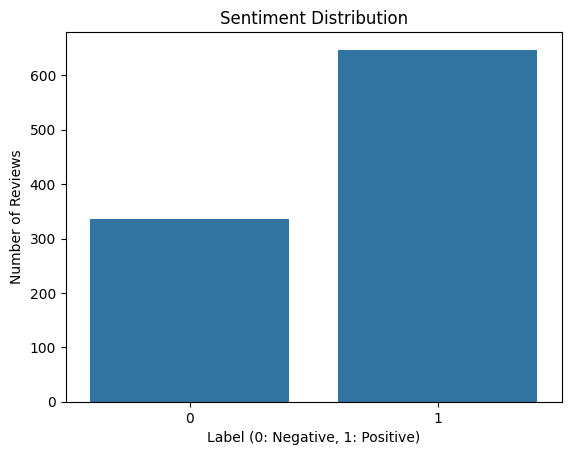

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="label", data=df)
plt.title("Sentiment Distribution")
plt.xlabel("Label (0: Negative, 1: Positive)")
plt.ylabel("Number of Reviews")
plt.show()


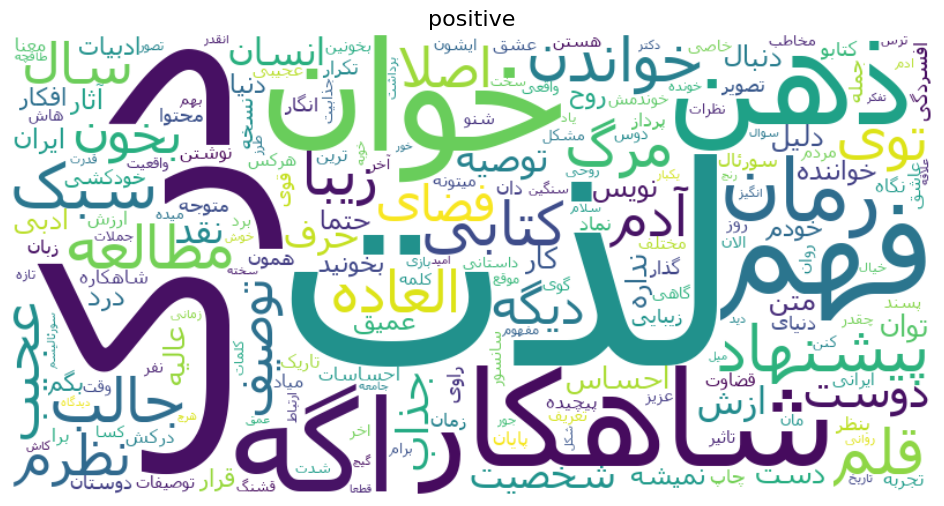

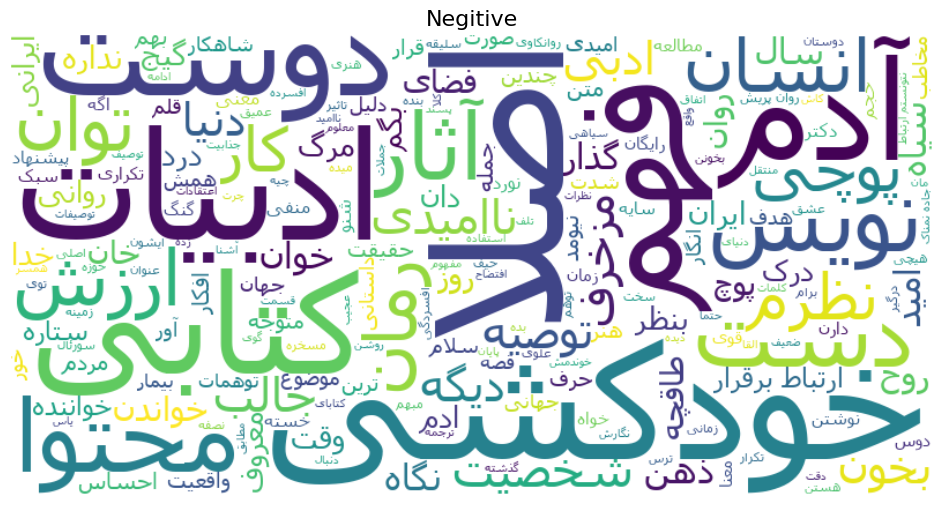

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

def reshape_text(text: str) -> str:
    reshaped_text = arabic_reshaper.reshape(text)  
    return get_display(reshaped_text)  

positive_text = " ".join(df[df["label"] == 1]["cleaned_text"])
negative_text = " ".join(df[df["label"] == 0]["cleaned_text"])

positive_text = reshape_text(positive_text)
negative_text = reshape_text(negative_text)


font_path = "C:/Windows/Fonts/tahoma.ttf"

wc_pos = WordCloud(
    width=800,
    height=400,
    background_color="white",
    font_path=font_path,
    stopwords=stopwords
).generate(positive_text)

wc_neg = WordCloud(
    width=800,
    height=400,
    background_color="white",
    font_path=font_path,
    stopwords=stopwords
).generate(negative_text)

plt.figure(figsize=(12, 6))
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("positive", fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negitive", fontsize=16)
plt.show()


In [ ]:
from collections import Counter

def top_words(texts, n=18):
    all_words = " ".join(texts).split()
    counter = Counter(all_words)
    return counter.most_common(n)

print("üìå Most frequent words in positive reviews:")
print(top_words(df[df["label"]==1]["cleaned_text"]))

print("\nüìå Most frequent words in negative reviews:") 
print(top_words(df[df["label"]==0]["cleaned_text"]))



üìå Most frequent words in positive reviews:
[('ŸÑÿ∞ÿ™', 68), ('ÿ¥ÿßŸá⁄©ÿßÿ±', 60), ('ÿØÿ±⁄©', 57), ('ÿÆŸàÿßŸÜ', 54), ('ÿ∞ŸáŸÜ', 53), ('ÿ≥ÿ®⁄©', 50), ('ŸÅŸáŸÖ', 49), ('ÿß⁄ØŸá', 49), ('ÿ±ŸÖÿßŸÜ', 47), ('ÿßÿØÿ®€åÿßÿ™', 44), ('Ÿæ€åÿ¥ŸÜŸáÿßÿØ', 42), ('ŸÖÿ∑ÿßŸÑÿπŸá', 41), ('ŸÇŸÑŸÖ', 41), ('ÿÆŸàÿßŸÜÿØŸÜ', 39), ('ÿ¨ÿßŸÑÿ®', 39), ('ŸÖÿ±⁄Ø', 38), ('⁄©ÿ™ÿßÿ®€å', 37), ('ÿ≠ÿ™ŸÖÿß', 37)]

üìå Most frequent words in negative reviews:
[('ÿßÿµŸÑÿß', 43), ('ÿÆŸàÿØ⁄©ÿ¥€å', 39), ('ÿßÿØÿ®€åÿßÿ™', 34), ('ŸÅŸáŸÖ', 30), ('ÿ¢ÿØŸÖ', 29), ('⁄©ÿ™ÿßÿ®€å', 29), ('ÿØŸàÿ≥ÿ™', 28), ('ÿßÿ±ÿ≤ÿ¥', 26), ('ŸÖÿ≠ÿ™Ÿàÿß', 26), ('ÿ¢ÿ´ÿßÿ±', 22), ('ÿØÿ≥ÿ™', 22), ('ÿ±ŸàÿßŸÜ', 22), ('ŸÜŸà€åÿ≥', 22), ('ÿßŸÜÿ≥ÿßŸÜ', 21), ('ÿ±ŸÖÿßŸÜ', 21), ('ÿßÿØÿ®€å', 21), ('ÿ™ŸàÿßŸÜ', 21), ('ŸÜÿ∏ÿ±ŸÖ', 20)]


: ÿ®ÿ±ÿØÿßÿ±ÿ≥ÿßÿ≤€å ŸÖÿ™ŸàŸÜ (Text Vectorization)

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import save_npz

df = pd.read_csv("C:/Users/Sepehr/SentimentProject/data/cleaned_reviews.csv", encoding="utf-8-sig")

X_texts = df["cleaned_text"].astype(str)
y = df["label"]

count_vectorizer = CountVectorizer(max_features=4000, ngram_range=(1, 2), min_df=5, max_df=0.95)
X_count = count_vectorizer.fit_transform(X_texts)

tfidf_vectorizer = TfidfVectorizer(max_features=4000, ngram_range=(1, 2), min_df=5, max_df=0.95)
X_tfidf = tfidf_vectorizer.fit_transform(X_texts)


print("‚úÖ ÿ¥⁄©ŸÑ ŸÖÿßÿ™ÿ±€åÿ≥ Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß:")
print("CountVectorizer:", X_count.shape)
print("TfidfVectorizer:", X_tfidf.shape)

print("\nüìå €≤€∞ Ÿà€å⁄ò⁄Ø€å ÿßŸàŸÑ CountVectorizer:")
print(count_vectorizer.get_feature_names_out()[:40])

print("\nüìå €≤€∞ Ÿà€å⁄ò⁄Ø€å ÿßŸàŸÑ TfidfVectorizer:")
print(tfidf_vectorizer.get_feature_names_out()[:40])

print("\nüìå Ÿæ€åÿ¥‚ÄåŸÜŸÖÿß€åÿ¥ ŸÖÿßÿ™ÿ±€åÿ≥ CountVectorizer:")
print(pd.DataFrame(X_count.toarray(), columns=count_vectorizer.get_feature_names_out()).head())

print("\nüìå Ÿæ€åÿ¥‚ÄåŸÜŸÖÿß€åÿ¥ ŸÖÿßÿ™ÿ±€åÿ≥ TfidfVectorizer:")
print(pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()).head())

‚úÖ ÿ¥⁄©ŸÑ ŸÖÿßÿ™ÿ±€åÿ≥ Ÿà€å⁄ò⁄Ø€å‚ÄåŸáÿß:
CountVectorizer: (983, 724)
TfidfVectorizer: (983, 724)

üìå €≤€∞ Ÿà€å⁄ò⁄Ø€å ÿßŸàŸÑ CountVectorizer:
['ÿ¢ÿ´ÿßÿ±' 'ÿ¢ÿÆÿ±' 'ÿ¢ÿÆÿ±ÿ¥' 'ÿ¢ÿØŸÖ' 'ÿ¢ÿØŸÖŸà' 'ÿ¢ÿØŸÖ€å' 'ÿ¢ÿ¥ŸÜÿß' 'ÿ¢ÿ¥ŸÜÿß€å€å' 'ÿ¢ŸÇÿß' 'ÿ¢ŸÑÿß€å'
 'ÿ¢ŸÜŸÇÿØÿ±' 'ÿ¢Ÿàÿ±' 'ÿ¢€åŸÜÿØŸá' 'ÿßÿ®ŸáÿßŸÖ' 'ÿßÿ™ŸÅÿßŸÇ' 'ÿßÿ™ŸÅÿßŸÇÿßÿ™' 'ÿßÿ´ÿßÿ±' 'ÿßÿ´ÿ±€å' 'ÿßÿ´€åÿ±€å'
 'ÿßÿ¨ÿ™ŸÖÿßÿπ€å' 'ÿßÿ≠ÿ™ÿ±ÿßŸÖ' 'ÿßÿ≠ÿ≥ÿßÿ≥' 'ÿßÿ≠ÿ≥ÿßÿ≥ÿßÿ™' 'ÿßÿÆÿ™€åÿßÿ±' 'ÿßÿÆÿ±' 'ÿßÿØÿßŸÖŸá' 'ÿßÿØÿ®' 'ÿßÿØÿ®€å'
 'ÿßÿØÿ®€åÿßÿ™' 'ÿßÿØÿ®€åÿßÿ™ ÿß€åÿ±ÿßŸÜ' 'ÿßÿØÿ®€åÿßÿ™ ÿØÿßÿ≥ÿ™ÿßŸÜ€å' 'ÿßÿØÿ®€åÿßÿ™ ŸÖÿπÿßÿµÿ±' 'ÿßÿØÿ®€åŸá' 'ÿßÿØŸÖ'
 'ÿßÿ±ÿ™ÿ®ÿßÿ∑' 'ÿßÿ±ÿ™ÿ®ÿßÿ∑ ÿ®ÿ±ŸÇÿ±ÿßÿ±' 'ÿßÿ±ÿ≤ÿ¥' 'ÿßÿ±ÿ≤ÿ¥ ÿÆŸàÿßŸÜÿØŸÜ' 'ÿßÿ±ÿ≤ÿ¥ ŸÜÿØÿßÿ±Ÿá' 'ÿßÿ≤ÿ¥']

üìå €≤€∞ Ÿà€å⁄ò⁄Ø€å ÿßŸàŸÑ TfidfVectorizer:
['ÿ¢ÿ´ÿßÿ±' 'ÿ¢ÿÆÿ±' 'ÿ¢ÿÆÿ±ÿ¥' 'ÿ¢ÿØŸÖ' 'ÿ¢ÿØŸÖŸà' 'ÿ¢ÿØŸÖ€å' 'ÿ¢ÿ¥ŸÜÿß' 'ÿ¢ÿ¥ŸÜÿß€å€å' 'ÿ¢ŸÇÿß' 'ÿ¢ŸÑÿß€å'
 'ÿ¢ŸÜŸÇÿØÿ±' 'ÿ¢Ÿàÿ±' 'ÿ¢€åŸÜÿØŸá' 'ÿßÿ®ŸáÿßŸÖ' 'ÿßÿ™ŸÅÿßŸÇ' 'ÿßÿ™ŸÅÿßŸÇÿßÿ™' 'ÿßÿ´ÿßÿ±' 'ÿßÿ´ÿ±€å' 'ÿßÿ´€åÿ±€å'
 'ÿßÿ¨ÿ™ŸÖÿß

In [20]:
df["label"].value_counts()

label
1    647
0    336
Name: count, dtype: int64

 ŸÖÿØŸÑÿ≥ÿßÿ≤€å €åÿßÿØ⁄Ø€åÿ±€å ŸÖÿßÿ¥€åŸÜ

In [21]:
import numpy as np
indices = np.where(y == 0)[0]
# print(indices)
count_0 = len(indices)
print(count_0)

indices = np.where(y == 1)[0]
# print(indices)
count_1 = len(indices)
print(count_1)

weight = round(count_1/count_0)
print("____________________________________", "\n", weight)


336
647
____________________________________ 
 2


Logistic Regression - CV F1-score (micro avg): 0.8034401319777127

üìå Logistic Regression:
Accuracy: 0.7157360406091371
              precision    recall  f1-score   support

           0       0.57      0.70      0.63        67
           1       0.82      0.72      0.77       130

    accuracy                           0.72       197
   macro avg       0.70      0.71      0.70       197
weighted avg       0.74      0.72      0.72       197


üìå Random Forest:
Accuracy: 0.7055837563451777
              precision    recall  f1-score   support

           0       0.59      0.43      0.50        67
           1       0.74      0.85      0.79       130

    accuracy                           0.71       197
   macro avg       0.67      0.64      0.65       197
weighted avg       0.69      0.71      0.69       197



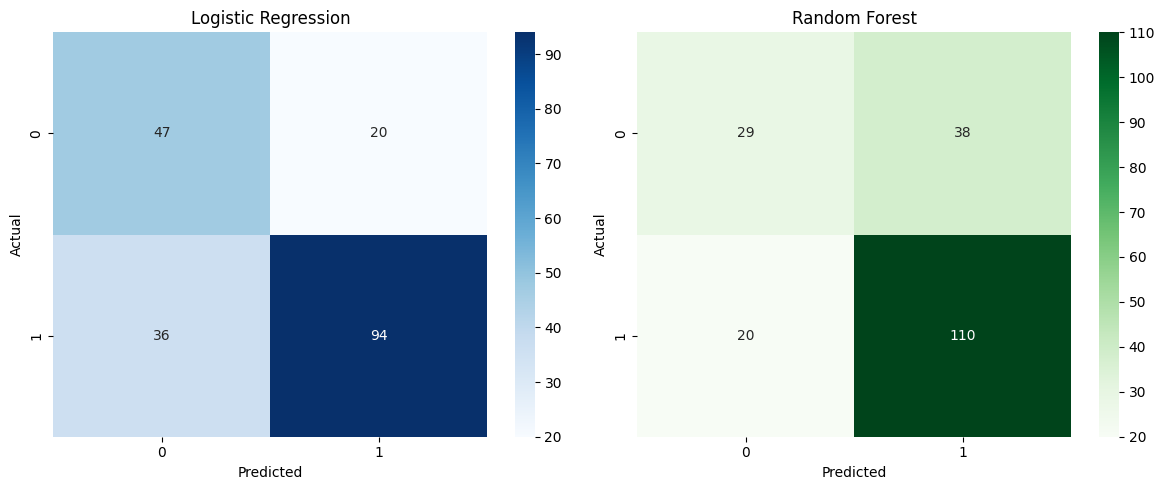

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:/Users/Sepehr/SentimentProject/data/cleaned_reviews.csv", encoding="utf-8-sig")
X_texts = df["cleaned_text"].astype(str)
y = df["label"]

X = X_tfidf

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
log_reg = LogisticRegression(
    max_iter=3000,
    solver='saga',           
    penalty='elasticnet',    
    l1_ratio=0.5,            
    C=1.6,                   
    class_weight='balanced', 
    random_state=42
)
# log_reg = LogisticRegression(
#     max_iter=2000,
#     solver='saga',      
#     class_weight='balanced', 
#     random_state=42
# )


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = cross_val_score(log_reg, X_train, y_train, cv=skf, scoring='f1')
print("Logistic Regression - CV F1-score (micro avg):", np.mean(f1_scores))

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)


rf = RandomForestClassifier(
    n_estimators=700,          
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


print("\nüìå Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr, digits=2, zero_division=0))

print("\nüìå Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=2, zero_division=0))


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_lr),
            annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()
